In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from hyperparameter_tuning import *

/Users/jordan/anaconda3/envs/challengeQRT/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
X_data_player_home=pd.read_csv('Train_Data/train_home_player_statistics_df.csv',index_col='ID')
X_data_player_away=pd.read_csv('Train_Data/train_away_player_statistics_df.csv',index_col='ID')

In [5]:
def calculate_nan_percentage(dataframe):
    # Count the number of NaN values in each column
    nan_counts = dataframe.isna().sum()

    # Calculate the percentage of NaN values in each column
    nan_percentage = (nan_counts / len(dataframe)) * 100

    return nan_percentage.sort_values(ascending=False)

PLAYER_LONG_BALLS_WON_season_std      100.000000
PLAYER_LONG_BALLS_5_last_match_sum    100.000000
PLAYER_SHOTS_OFF_TARGET_season_sum    100.000000
PLAYER_CAPTAIN_season_average         100.000000
PLAYER_LONG_BALLS_season_average      100.000000
                                         ...    
PLAYER_ASSISTS_season_sum               1.517216
PLAYER_MINUTES_PLAYED_season_sum        1.517216
TEAM_NAME                               0.000000
PLAYER_NAME                             0.000000
LEAGUE                                  0.000000
Length: 306, dtype: float64

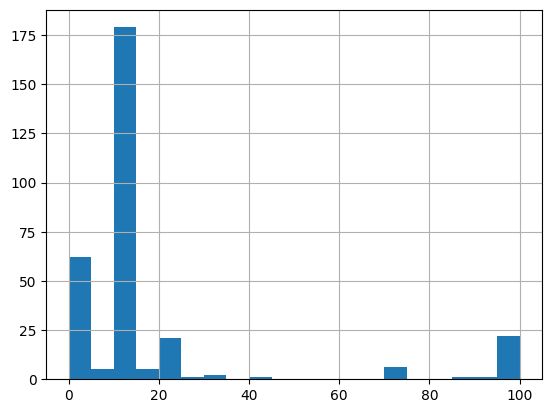

In [6]:
nan_value_X_data_player_home=calculate_nan_percentage(X_data_player_home)
nan_value_X_data_player_home.hist(bins=20)
nan_value_X_data_player_home

In [10]:
columns_to_drop_X_data_player=list(nan_value_X_data_player_home[nan_value_X_data_player_home>40].index) 

In [12]:
X_data_player_home_nona_home=X_data_player_home.drop(columns=columns_to_drop_X_data_player)
X_data_player_home_nona_filled=X_data_player_home_nona_home.fillna(0)


In [14]:
X_data_player_away_nona_home=X_data_player_away.drop(columns=columns_to_drop_X_data_player)
X_data_player_away_nona_filled=X_data_player_away_nona_home.fillna(0)


In [18]:
sum_columns=[col for col in X_data_player_away_nona_filled.columns if 'sum' in col]
std_columns=[col for col in X_data_player_away_nona_filled.columns if 'std' in col]
avg_columns=[col for col in X_data_player_away_nona_filled.columns if '_season_average' in col]

In [19]:
avg_columns

['PLAYER_ACCURATE_CROSSES_season_average',
 'PLAYER_ACCURATE_PASSES_season_average',
 'PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average',
 'PLAYER_AERIALS_WON_season_average',
 'PLAYER_ASSISTS_season_average',
 'PLAYER_BIG_CHANCES_CREATED_season_average',
 'PLAYER_BIG_CHANCES_MISSED_season_average',
 'PLAYER_BLOCKED_SHOTS_season_average',
 'PLAYER_CLEARANCES_season_average',
 'PLAYER_CLEARANCE_OFFLINE_season_average',
 'PLAYER_DISPOSSESSED_season_average',
 'PLAYER_DRIBBLED_ATTEMPTS_season_average',
 'PLAYER_DRIBBLED_PAST_season_average',
 'PLAYER_DUELS_LOST_season_average',
 'PLAYER_DUELS_WON_season_average',
 'PLAYER_ERROR_LEAD_TO_GOAL_season_average',
 'PLAYER_FOULS_season_average',
 'PLAYER_FOULS_DRAWN_season_average',
 'PLAYER_GOALKEEPER_GOALS_CONCEDED_season_average',
 'PLAYER_GOALS_season_average',
 'PLAYER_GOALS_CONCEDED_season_average',
 'PLAYER_HIT_WOODWORK_season_average',
 'PLAYER_INTERCEPTIONS_season_average',
 'PLAYER_KEY_PASSES_season_average',
 'PLAYER_MINUTES_PLAYED_se